In [3]:
from numpy import array
from numpy.linalg import inv
from numpy import transpose as tp
from numpy import dot
from random import random
import matplotlib.pyplot as plt

# Zwracamy równanie liniowej regresji dla argumentów X i wartości Y
def regression(X, Y):
	X = [ [1, x] for x in X]
	Y = [ y for y in Y]

	b = dot(inv(dot(tp(X), X)), dot(tp(X), Y))

	return lambda x: b[0] + b[1]*x

# Uśredniamy dane
def normalize(X):
	def avg(i):
		a = max(i - 6, 0)
		r = X[a:i+1]
		return sum(r)/len(r)

	return [ avg(i) for i in range(len(X)) ]


deaths = []
cases = []

with open("Mexico.csv", "r") as f:
	for line in f:
		line = line.split(',')
		deaths.append(int(line[-2]))
		cases.append(int(line[-4]))



deaths = normalize(deaths)
cases = normalize(cases)
X = [i for i in range(len(deaths))]

# Regresja liniowa dla zgonów

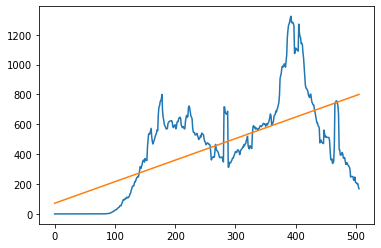

In [4]:
dr = regression(X, deaths)
plt.plot(deaths)
plt.plot([dr(x) for x in X])
plt.show()


# Regresja liniowa dla zachorowań

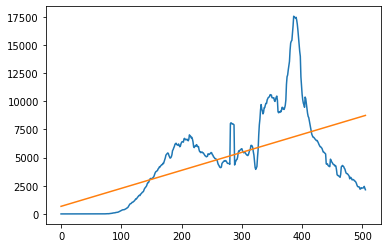

In [5]:
cr = regression(X, cases)
plt.plot(cases)
plt.plot([cr(x) for x in X])
plt.show()

# Obszary najlepszego dopasowania

Za miarę dopasowania przyjmujemy średnią błędów (tj. odległości w sensie kwadratowym od prostej) wszystkich punktów na badanym przedziale.

Wybieramy ze zbioru wszystkich prostych takie, których dopasowanie jest najlepsze i wyrzucamy wszystkie proste, które się z nimi przecinają.
W rezultacie otrzymujemy zbiór najlepiej dopasowanych prostych pokrywających możliwie najwięcej danych.

In [6]:
def sqrt(x):
	return x**0.5

def fit(a, b, data):
	X = [n for n in range(a, b)]
	Y = data[a:b]
	r = regression(X, Y)
	error = sum([ (Y[i] - r(X[i]))**2 for i in range(len(X)) ])
	return (r, error/len(X), (a, b))


def overlapping(L, l):
	(A, B), (a, b) = L[2], l[2]
	return set(range(A, B)).intersection(range(a, b))


def plot_sample(data):
	diff = 20; size = len(data)
	lines = [ fit(a, b, data) for a in range(size) for b in range(size) if b - a >= diff ]

	plt.plot(data)

	
	# szukanie najlepszych prostych
	picks = []
	while lines:
		best = min(lines, key = lambda x: x[1])
		picks += [best]
		lines = [l for l in lines if not overlapping(best, l)]


	# kolorowanie
	errmax = max(picks, key = lambda x: x[1])[1]
	for l in picks:
		r, err, (A, B) = l
		plt.plot([ x for x in range(A, B) ], [ r(x) for x in range(A, B) ], color=(sqrt(err/errmax), (1-sqrt(err/errmax)), 0.0))



	plt.show()

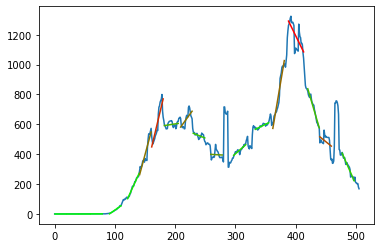

In [7]:
plot_sample(deaths)

Kolor odpowiada stopniu dopasowania -- im bliżej zielonego tym lepiej.